In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression



from sklearn.model_selection import KFold
from sklearn import svm, datasets
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
fem=pd.read_csv('./data/z_complete/fem.csv')
man=pd.read_csv('./data/z_complete/men.csv')

In [3]:
df=pd.concat([fem,man])
df.shape

(12890, 3)

In [4]:
df = shuffle(df)
df.head(5)
#df=df.sample(frac = 0.01)

,subreddit,created_utc,text
5633,Feminism,1615476583,That s correct There is also a handy picture e...
2748,MensRights,1616880807,Yes Twitter posts the gender breakdown of thei...
4919,Feminism,1615653107,I mean they literally agreed with me when I as...
5022,Feminism,1615658528,We should let innocent beings suffer and stay ...
1653,Feminism,1615991831,For real in honesty I want to hear this pers...


In [5]:
df['subreddit'] = np.where(df['subreddit'] == 'MensRights', 1, 0)

In [6]:
df.drop(columns='created_utc', inplace=True)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfid = TfidfVectorizer(stop_words='english')
#Add the stop words so that we can get some actual idea of the most prevelent words
X = df.text
y= df.subreddit
tfid.fit(X)
text_tf = tfid.transform(df.text)
#Transform
text_df = pd.DataFrame(text_tf.toarray(), columns=tfid.get_feature_names())
text_df

,aacknowledged,aback,abandon,abandoned,abandoning,abbreviation,abby,abc,abdicating,abdication,...,zombies,zone,zoned,zones,zoning,zoo,zoologist,zoom,zora,zygomatic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X = text_df.drop(columns=['subreddit'])
stan = StandardScaler()
X_stan = stan.fit_transform(X)

In [9]:
X, y = X_stan, y

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_stan,
    y,
    test_size=0.33,
    random_state=42
)

In [11]:
logreg = LogisticRegression(max_iter=5000)

In [12]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [15]:
preds = logreg.predict(X_test)

In [16]:
report=classification_report(y_test,preds, output_dict=True)
report

{'0': {'precision': 0.9236461486713757,
  'recall': 0.9814152966404575,
  'f1-score': 0.951654825853405,
  'support': 2798},
 '1': {'precision': 0.9594067135050741,
  'recall': 0.8440934065934066,
  'f1-score': 0.8980635732553892,
  'support': 1456},
 'accuracy': 0.9344146685472496,
 'macro avg': {'precision': 0.941526431088225,
  'recall': 0.9127543516169321,
  'f1-score': 0.9248591995543971,
  'support': 4254},
 'weighted avg': {'precision': 0.93588577781991,
  'recall': 0.9344146685472496,
  'f1-score': 0.9333123566990301,
  'support': 4254}}

In [17]:
report_clean={'Not r/MensRights': {'precision': 0.9402782490668476,
  'recall': 0.9750175932441942,
  'f1-score': 0.9573328726895838,
  'support': 2842},
 'r/MensRights': {'precision': 0.9456771231828616,
  'recall': 0.8753541076487252,
  'f1-score': 0.9091577785950719,
  'support': 1412},
 'accuracy': 0.9419370004701457,
 'macro avg': {'precision': 0.9429776861248547,
  'recall': 0.9251858504464597,
  'f1-score': 0.9332453256423279,
  'support': 4254},
 'weighted avg': {'precision': 0.9420702589991024,
  'recall': 0.9419370004701457,
  'f1-score': 0.9413424559379499,
  'support': 4254}}

In [18]:
report=classification_report(y_test,preds, output_dict=True)
shemegel = pd.DataFrame(report_clean).transpose()
shemegel

,precision,recall,f1-score,support
Not r/MensRights,0.940278,0.975018,0.957333,2842.000000
r/MensRights,0.945677,0.875354,0.909158,1412.000000
accuracy,0.941937,0.941937,0.941937,0.941937
macro avg,0.942978,0.925186,0.933245,4254.000000
weighted avg,0.942070,0.941937,0.941342,4254.000000


In [19]:
cm = confusion_matrix(y_test, preds)
cm

array([[2746,   52],
       [ 227, 1229]], dtype=int64)

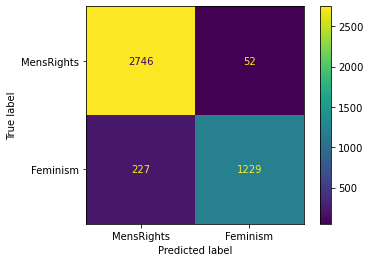

In [20]:
disp = ConfusionMatrixDisplay(cm, display_labels=['MensRights','Feminism'])
disp.plot();